# Simple Linear Regression

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

선형회귀분석. RSS(잔차 제곱 합) 값을 최소화 하는 방향으로 Y=wX 방정식의 w값을 구하는 모형.
잔차: y값과 y값으로 추정된 값의 차이

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Example
Salary vs. YearsExperienced

### Step1: Load Dataset

In [2]:
# 'Salary_Data.csv' 파일 읽기 pd.read_csv()
# df shape 확인

df = pd.read_csv('Salary_Data.csv')
df.shape

(30, 2)

In [3]:
# df head 행 보기

df.head()

,YearsExperience,Salary
0,1.1,43610
1,1.3,54936
2,1.5,41160
3,2.0,49240
4,2.2,45134


In [4]:
# df descriptive statistics

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,84118.000000
std,2.837888,30414.439404
min,1.100000,41160.000000
25%,3.200000,59507.250000
50%,4.700000,71052.500000
75%,7.700000,115466.000000
max,10.500000,137827.000000


### Step2: Visualize Dataset

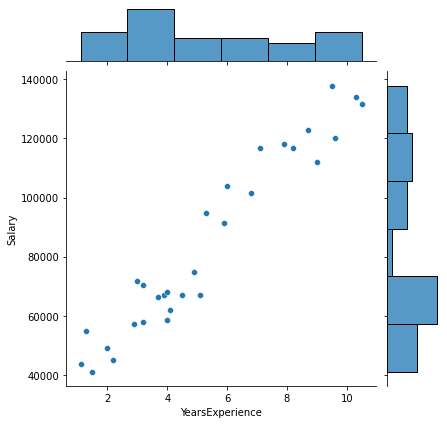

In [7]:
# sns.jointplot 활용한 시각화. x='YearsExperience', y='Salary'

sns.jointplot(data=df,x='YearsExperience',y='Salary')

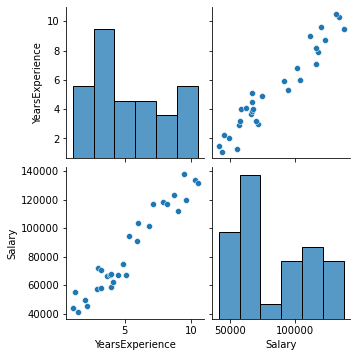

In [8]:
# sns.pairplot

sns.pairplot(df)

### Step3: Define Train set and Test Set

In [9]:
# X에 -1번째 column까지 할당
# y에 -1번째 column을 할당

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [10]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)


In [11]:
X_train.shape

(24, 1)

### Step4: Train Model

In [12]:
# define regressor type, and fit with train set

# from sklearn.linear_model import LinearRegression
# regressor 에 LinearRegression() 오브젝트 할당
# X_train, y_train 으로 regressor fit

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
# regression model's Estimated coefficients

# regressor 의 coefficient 확인

regressor.coef_

array([10116.36973003])

In [14]:
# regression model's independent term in the linear model.
# Set to 0.0 if fit_intercept = False.

# regressor의 intercept 확인

regressor.intercept_

29166.070331779556

In [ ]:
# Salary = w * YearExperience + intercept
# y^

### Step5: Predict value

In [15]:
# predict y values with trained regressor

# y_pred에 X_test를 regressor으로 predict 한 값을 저장

y_pred = regressor.predict(X_test)

In [16]:
X_test

,YearsExperience
17,5.3
21,7.1
10,3.9
19,6.0
14,4.5
20,6.8


In [17]:
y_pred

array([ 82782.82990092, 100992.29541497,  68619.91227888,  89864.28871194,
        74689.7341169 ,  97957.38449596])

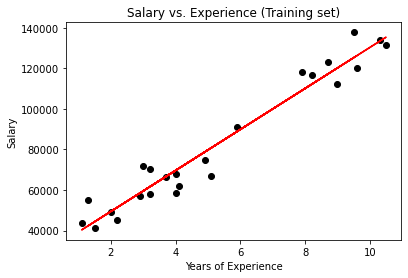

In [18]:
# train set visualization

plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Salary vs. Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

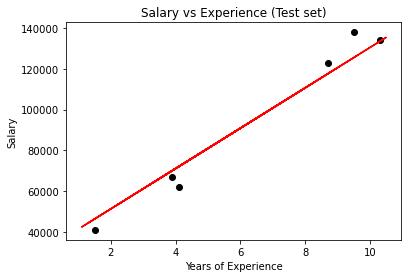

In [14]:
# test set visualization

plt.scatter(X_test, y_test, color='black')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Exercise

Temperature vs. Revenue

### Step1: Load Dataset

In [19]:
# 'IceCreamData.csv' 파일 읽기 pd.read_csv()
# df shape 확인

df = pd.read_csv("IceCreamData.csv")
df.shape

(500, 2)

In [20]:
# df tail 행 보기

df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [21]:
# df descriptive statistics

df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


### Step2: Visualize Dataset¶

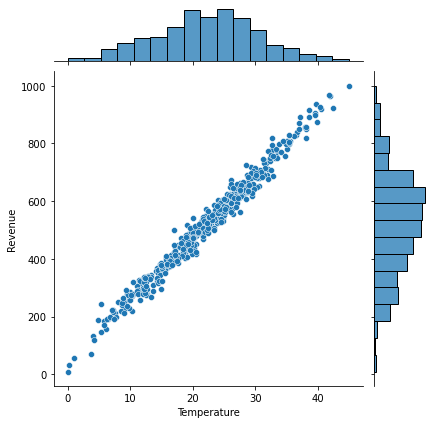

In [23]:
# sns.jointplot 활용한 시각화. x='Temperature', y='Revenue'

sns.jointplot(data=df,x='Temperature', y='Revenue')

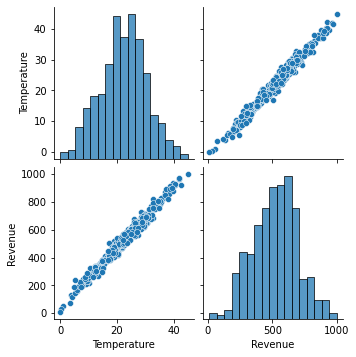

In [26]:
# sns.pairplot

sns.pairplot(df)

### Step3: Define Train set and Test Set

In [45]:
# X에 "Temperature" column을 할당
# y에 "Revenue" column을 할당


X = df[['Temperature']]

y = df['Revenue']

In [46]:
df.iloc[:,0]

df.iloc[:,:0]

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [47]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=1


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)


In [48]:
X_train.shape

(400, 1)

### Step4: Train Model

In [49]:
# define regressor type, and fit with train set

# from sklearn.linear_model import LinearRegression
# regressor 에 LinearRegression() 오브젝트 할당
# X_train, y_train 으로 regressor fit

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [50]:
# regression model's Estimated coefficients

# regressor 의 coefficient 확인
#coef : 계수 y=ax+b 에서 a값(기울기)를 나타냄

regressor.coef_

array([21.33925059])

In [51]:
# regression model's independent term in the linear model.
# Set to 0.0 if fit_intercept = False.

# regressor의 intercept 확인
#y=ax+b 에서 b값(절편) 을 뜻한다

regressor.intercept_

47.32149169746572

### Step5: Predict value

In [52]:
# predict y values with trained regressor

# y_pred에 X_test를 regressor으로 predict 한 값을 저장

y_pred = regressor.predict(X_test)

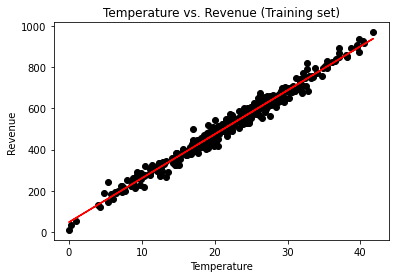

In [53]:
# train set visualization

plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Temperature vs. Revenue (Training set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

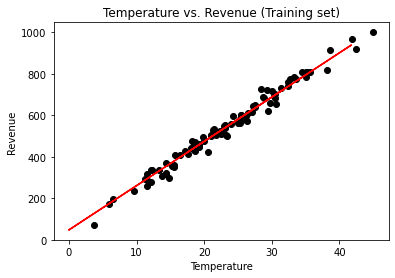

In [54]:
# test set visualization

plt.scatter(X_test, y_test, color='black')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Temperature vs. Revenue (Training set)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()